In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/Shareddrives/My\ paper

/content/drive/Shareddrives/My paper


In [ ]:
import math
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Import the Keras libraries and packages
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, LSTM, Dropout, TimeDistributed, Embedding, Input
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from keras import backend as K

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix,classification_report
from sklearn import tree
from scipy.stats import spearmanr
from collections import Counter

## 處理 y

In [ ]:
data = pd.read_csv('./Customer Value Prediction/TABLES/Session Behaviors Count.csv')

In [ ]:
data.head(10)

,MemberID,SessionOrder,add,checkout,purchase,register,search,traffic,viewactivity,viewcategory,viewmainpage,viewproduct,TimeDiff,TotalTime,uid_filled,TotalSalesAmount,Active,VIP
0,RSQpIPxqSK2ooLPuUwWw8HhTN73mFGsmGPEmdarbdGM=,2127581,1,2,1,0,0,0,0,9,15,4,0,22,RSQpIPxqSK2ooLPuUwWw8HhTN73mFGsmGPEmdarbdGM%3D,0.0,0.0,0.0
1,AqBrlkHltks4neA3Fmtq+yfiI4F7aZGODqKPeF3zGsA=,921405,0,0,0,0,0,0,0,0,1,0,0,0,AqBrlkHltks4neA3Fmtq%2ByfiI4F7aZGODqKPeF3zGsA%3D,0.0,0.0,0.0
2,AqBrlkHltks4neA3Fmtq+yfiI4F7aZGODqKPeF3zGsA=,921406,3,2,2,0,0,0,0,5,6,22,17443,7,AqBrlkHltks4neA3Fmtq%2ByfiI4F7aZGODqKPeF3zGsA%3D,0.0,0.0,0.0
3,AqBrlkHltks4neA3Fmtq+yfiI4F7aZGODqKPeF3zGsA=,921407,0,0,0,0,0,0,0,0,1,0,3896,0,AqBrlkHltks4neA3Fmtq%2ByfiI4F7aZGODqKPeF3zGsA%3D,0.0,0.0,0.0
4,AqBrlkHltks4neA3Fmtq+yfiI4F7aZGODqKPeF3zGsA=,921408,1,1,1,0,0,0,0,2,4,9,1585,30,AqBrlkHltks4neA3Fmtq%2ByfiI4F7aZGODqKPeF3zGsA%3D,0.0,0.0,0.0
5,AqBrlkHltks4neA3Fmtq+yfiI4F7aZGODqKPeF3zGsA=,921409,0,0,0,0,0,0,0,0,1,0,35815,0,AqBrlkHltks4neA3Fmtq%2ByfiI4F7aZGODqKPeF3zGsA%3D,0.0,0.0,0.0
6,AqBrlkHltks4neA3Fmtq+yfiI4F7aZGODqKPeF3zGsA=,921410,0,0,0,0,0,0,0,0,1,1,220,0,AqBrlkHltks4neA3Fmtq%2ByfiI4F7aZGODqKPeF3zGsA%3D,0.0,0.0,0.0
7,AqBrlkHltks4neA3Fmtq+yfiI4F7aZGODqKPeF3zGsA=,921411,0,0,0,0,0,0,0,0,1,0,1396,0,AqBrlkHltks4neA3Fmtq%2ByfiI4F7aZGODqKPeF3zGsA%3D,0.0,0.0,0.0
8,x/e5hrkgQCnCkhBzvk8Hs8i5dnX4tHRlrjHtKm6yvLg=,4411285,0,0,0,0,0,1,0,0,0,0,0,0,x%2Fe5hrkgQCnCkhBzvk8Hs8i5dnX4tHRlrjHtKm6yvLg%3D,0.0,0.0,0.0
9,x/e5hrkgQCnCkhBzvk8Hs8i5dnX4tHRlrjHtKm6yvLg=,4411286,0,0,0,0,0,1,0,0,0,0,0,0,x%2Fe5hrkgQCnCkhBzvk8Hs8i5dnX4tHRlrjHtKm6yvLg%3D,0.0,0.0,0.0


In [ ]:
memberIDs = data['MemberID'].unique()
print(len(memberIDs))

83931


## normalize data

In [ ]:
cols = ['add', 'checkout', 'purchase', 'register', 'search', 'traffic', 'viewactivity',
       'viewcategory', 'viewmainpage', 'viewproduct' , 'TimeDiff', 'TotalTime']

In [ ]:
def normalize(data, scaler):
  df = data.copy()
  norm_df = df.copy()[['MemberID']]
  scaled_df = pd.DataFrame(scaler.fit_transform(df[cols].values.reshape(-1,12)), columns=cols)
  norm_df = pd.concat([norm_df, scaled_df], axis=1)
  
  return norm_df

In [ ]:
data.describe()

,SessionOrder,add,checkout,purchase,register,search,traffic,viewactivity,viewcategory,viewmainpage,viewproduct,TimeDiff,TotalTime,TotalSalesAmount,Active,VIP
count,7.005130e+05,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000
mean,2.318815e+06,0.166998,0.098234,0.055479,0.012821,0.062353,0.402852,0.036750,1.205088,1.284503,1.558018,13576.392959,1.747105,1377.119483,0.293521,0.161799
std,1.335184e+06,0.837909,0.635376,0.343568,0.141419,0.391526,0.490472,0.373704,3.212392,2.095138,4.266150,37707.913370,5.631009,4220.274239,0.455375,0.368266
min,7.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1680.000000,0.000000,0.000000
25%,1.165879e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.325449e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,701.000000,0.000000,0.000000,0.000000,0.000000
75%,3.482036e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,7369.000000,1.000000,1380.000000,1.000000,0.000000
max,4.610624e+06,81.000000,62.000000,16.000000,41.000000,47.000000,1.000000,38.000000,182.000000,995.000000,247.000000,520331.000000,190.000000,181428.000000,1.000000,1.000000


In [ ]:
scaler = MinMaxScaler()
data_scaled = normalize(data, scaler)

In [ ]:
data_scaled.describe()

,add,checkout,purchase,register,search,traffic,viewactivity,viewcategory,viewmainpage,viewproduct,TimeDiff,TotalTime
count,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000,700513.000000
mean,0.002062,0.001584,0.003467,0.000313,0.001327,0.402852,0.000967,0.006621,0.001291,0.006308,0.026092,0.009195
std,0.010345,0.010248,0.021473,0.003449,0.008330,0.490472,0.009834,0.017651,0.002106,0.017272,0.072469,0.029637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001005,0.000000,0.001347,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.005495,0.002010,0.004049,0.014162,0.005263
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 整理 X

In [ ]:
g = data_scaled.groupby('MemberID').cumcount()
s = 12 - data_scaled.groupby('MemberID').size()

In [ ]:
index_df = pd.merge(pd.concat([data_scaled[['MemberID']],pd.DataFrame(g, columns=['count'])[['count']]],axis=1), pd.DataFrame(s, columns=['size'])['size'], on='MemberID')

In [ ]:
index_df['new_index'] = index_df['count'] + index_df['size']

In [ ]:
mux = pd.MultiIndex.from_product([data_scaled['MemberID'].unique(), g.unique()])
X = np.array(data_scaled.set_index(['MemberID',index_df['new_index']])
       .reindex(mux, fill_value=0)
       .groupby(level=0)[cols]
       .apply(lambda x: x.values.tolist())
       .tolist())

In [ ]:
data_non_dup = data.drop_duplicates(subset=['MemberID'], keep='last')

In [ ]:
Counter(data_non_dup['VIP'])

Counter({0.0: 72733, 1.0: 11198})

In [ ]:
y = data_non_dup['VIP']

In [ ]:
counter = Counter(y)
print(counter)

Counter({0.0: 72733, 1.0: 11198})


In [ ]:
X.shape

(83931, 12, 12)

In [ ]:
X = pd.DataFrame(X.reshape(len(X), 12*12))

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.005495,0.002010,0.000000,0.029352,0.005263
1,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.005495,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.001005,0.000000,0.009346,0.000000
2,0.024691,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.001005,0.097166,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.002010,0.016194,0.036475,0.005263
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.005495,0.000000,0.000000,0.000919,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.021978,0.004020,0.032389,...,0.0,0.0,0.000000,0.0,0.0,0.109890,0.003015,0.060729,0.001149,0.015789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83926,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.004049,0.000000,0.000000
83927,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.002010,0.000000,0.127108,0.000000
83928,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.004049,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.001005,0.000000,0.000352,0.000000
83929,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


## 做 undersampling

In [ ]:
class DataUds():
  def __init__(self, minor_weight, X, y):
    self.minor_weight = minor_weight
    self.X = X
    self.y = y

    self.reset()

  def reset(self):
    self.X_res = []
    self.y_res = []

  def get_major_num(self):
    counter = Counter(self.y)
    print('Orginal num:', counter)
    major_num = int(counter[1] * ((1-self.minor_weight)/self.minor_weight))
    return major_num

  def undersample(self, major_num):
    nm = NearMiss(sampling_strategy={0: major_num}, version=1)
    self.X_res, self.y_res = nm.fit_resample(X, y) 
    print('Undersmapling num:', Counter(self.y_res))

  def run(self):
    major_num = self.get_major_num()
    self.undersample(major_num)

In [ ]:
uds_1 = DataUds(0.5, X, y)
uds_1.run()

Orginal num: Counter({0.0: 72733, 1.0: 11198})
Undersmapling num: Counter({0.0: 11198, 1.0: 11198})


In [ ]:
X_res = uds_1.X_res
y_res = uds_1.y_res

In [ ]:
X_uds = np.array(X_res).reshape(len(X_res), 12, 12)
y_uds = y_res

In [ ]:
data_uds = pd.concat([X_res, y_res], axis=1)

In [ ]:
data_uds.to_csv('Session Behavior Count Undersampled Data.csv', index=False)

In [ ]:
X_uds[3].shape

(12, 12)

## 切割訓練測試集

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_uds, y_uds, test_size=0.2, random_state=123)

In [ ]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

17916 17916 4480 4480


In [ ]:
X_train.shape

(17916, 12, 12)

In [ ]:
y_train.shape

(17916,)

In [ ]:
Counter(y_train)

Counter({0.0: 9004, 1.0: 8912})

In [ ]:
Counter(y_test)

Counter({0.0: 2194, 1.0: 2286})

In [ ]:
data_uds['Train/Test'] = ['Test'] * len(data_uds)
data_uds.loc[y_train.index, 'Train/Test'] = 'Train'

In [ ]:
data_uds.to_csv('Train Test Data.csv', index=False)

## LSTM

## model 試驗

In [ ]:
model = Sequential()

model.add(LSTM(64, input_shape=(12, 12), return_sequences=True))       
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.01)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 64)            19712     
                                                                 
 dense_2 (Dense)             (None, 12, 1)             65        
                                                                 
Total params: 19,777
Trainable params: 19,777
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
callback = EarlyStopping(monitor='loss', patience=3)
EPOCHS = 30
BATCH_SIZE = 512
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, callbacks=[callback], verbose=1)

Epoch 1/30
47/47 [==============================] - 5s 66ms/step - loss: 0.6037 - accuracy: 0.7046 - val_loss: 0.5448 - val_accuracy: 0.7563
Epoch 2/30
47/47 [==============================] - 2s 53ms/step - loss: 0.5192 - accuracy: 0.7694 - val_loss: 0.4863 - val_accuracy: 0.7964
Epoch 3/30
47/47 [==============================] - 3s 54ms/step - loss: 0.4907 - accuracy: 0.7887 - val_loss: 0.4813 - val_accuracy: 0.7997
Epoch 4/30
47/47 [==============================] - 2s 52ms/step - loss: 0.4874 - accuracy: 0.7904 - val_loss: 0.4725 - val_accuracy: 0.8023
Epoch 5/30
47/47 [==============================] - 3s 54ms/step - loss: 0.4793 - accuracy: 0.7961 - val_loss: 0.4792 - val_accuracy: 0.7998
Epoch 6/30
47/47 [==============================] - 3s 54ms/step - loss: 0.4793 - accuracy: 0.7964 - val_loss: 0.4653 - val_accuracy: 0.8059
Epoch 7/30
47/47 [==============================] - 3s 55ms/step - loss: 0.4752 - accuracy: 0.7988 - val_loss: 0.4635 - val_accuracy: 0.8066
Epoch 8/30
47

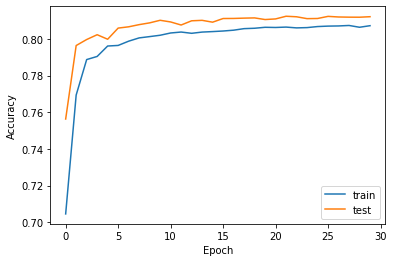

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
y_pred = (prediction[:, -1] > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
print('F1 score: ', f1_score(y_pred, y_test))
print('AUC score: ', roc_auc_score(y_pred, y_test))
print('Confusion matrix:')
confusion_matrix(y_test,y_pred)

Accuracy of the model :  0.8648540048218591
F1 score:  0.7279590186033971
AUC score:  0.897432812433607
Confusion matrix:


array([[5107,   71],
       [ 938, 1350]])

In [ ]:
labels = ['NotVIP', 'VIP']

In [ ]:
Counter(y_test)

Counter({0.0: 5178, 1.0: 2288})

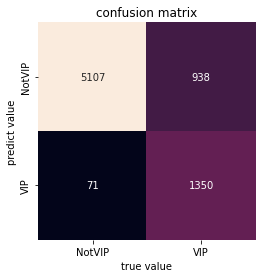

In [ ]:
matric = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(4,4))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=labels, yticklabels=labels)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("report:\n",classification_report(y_pred, y_test,labels=[0, 1],target_names=labels))

report:
               precision    recall  f1-score   support

      NotVIP       0.99      0.84      0.91      6045
         VIP       0.59      0.95      0.73      1421

    accuracy                           0.86      7466
   macro avg       0.79      0.90      0.82      7466
weighted avg       0.91      0.86      0.88      7466



In [ ]:
prediction_all = model.predict(np.array(X).reshape(len(X), 12, 12))

In [ ]:
y_pred_all = (prediction_all[:, -1] > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred_all, y))
print('F1 score: ', f1_score(y_pred_all, y))
print('AUC score: ', roc_auc_score(y_pred_all, y))
print('Confusion matrix:')
confusion_matrix(y_pred_all, y)

Accuracy of the model :  0.4339874420655062
F1 score:  0.2179567378922069
AUC score:  0.5002303099048644
Confusion matrix:


array([[29805,  4578],
       [42928,  6620]])

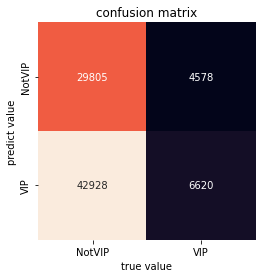

In [ ]:
matric = confusion_matrix(y_pred_all, y)
plt.figure(figsize=(4,4))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=labels, yticklabels=labels)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("report:\n",classification_report(y_pred_all, y,labels=[0, 1],target_names=labels))

report:
               precision    recall  f1-score   support

      NotVIP       0.41      0.87      0.56     34383
         VIP       0.59      0.13      0.22     49548

    accuracy                           0.43     83931
   macro avg       0.50      0.50      0.39     83931
weighted avg       0.52      0.43      0.36     83931



In [ ]:
model.layers[0].get_weights()[0].shape

(12, 256)

In [ ]:
def get_layer_output(X, idx):
  get_output = K.function([model.layers[0].input], [model.layers[idx].output])
  return get_output([X])

In [ ]:
layer_output_1 = get_layer_output(X_test, 0)
layer_output_2 = get_layer_output(X_test, 1)
# layer_output_3 = get_layer_output(X_test, 2)
# layer_output_5 = get_layer_output(X_test, 4)

In [ ]:
ot = pd.DataFrame(layer_output_2[0][:, -1], columns=['P'])
ot[ot['P']>0.5]

,P
2,0.999998
3,1.000000
4,1.000000
5,1.000000
6,1.000000
...,...
4471,0.999999
4472,1.000000
4475,1.000000
4476,1.000000


In [ ]:
def inverse_normalize(data, scaler):
  scaled_df = pd.DataFrame(scaler.inverse_transform(data[cols].values.reshape(-1,12)), columns=cols)
  return scaled_df

In [ ]:
bh_cols = ['add', 'checkout', 'purchase', 'register', 'search', 'traffic', 'viewactivity', 'viewcategory', 'viewmainpage', 'viewproduct']

In [ ]:
X_test_tp = X_test.transpose(0, 1 ,2)
test_data_df = pd.concat([pd.DataFrame(x, columns=cols) for x in X_test_tp], keys=np.arange(X_test_tp.shape[0]))
test_data_df.reset_index(inplace=True)
test_data_df = test_data_df.drop(['level_0', 'level_1'], axis=1)
test_original = inverse_normalize(test_data_df, scaler)
test_original[cols] = test_original[cols].astype(int)

In [ ]:
test_original['bh'] = test_original[bh_cols].apply(lambda x: '\n'.join([y+':'+str(z) for y, z in x.items() if z != 0]), axis=1).to_list()
test_original['x_label'] = (test_original['bh']  
    + ['\n△time:'] * len(test_original) + test_original['TimeDiff'].astype(str)
    + ['\nTotalTime:'] * len(test_original) + test_original['TotalTime'].astype(str))

In [ ]:
test_original['x_label'][0]

'traffic:1\n△time:0\nTotalTime:0'

In [ ]:
layer_output_2[0][0].shape

(12, 1)

## 結果解釋

In [ ]:
def output_ex(idx):
  start_idx = idx * 12
  end_idx = start_idx + 12
  eg = test_original.iloc[start_idx: end_idx]
  eg = eg.loc[~(eg[bh_cols]==0).all(axis=1)]
  x_label =  list(eg['x_label'])
  output_eg = list(layer_output_2[0][idx].reshape(1,12)[0])[-len(x_label):]
  x_axis = range(len(x_label))
  base = [0.5] * len(x_axis)

  plt.figure(figsize=(20,10))
  plt.plot(x_axis, output_eg, color="red", marker='o', markerfacecolor='black', markersize=4)
  plt.plot(x_axis, base, color="blue", linestyle='dashed')
  plt.xticks(x_axis,x_label)
  plt.xlabel('Behavior')
  plt.ylabel('P(VIP)')
  plt.show()

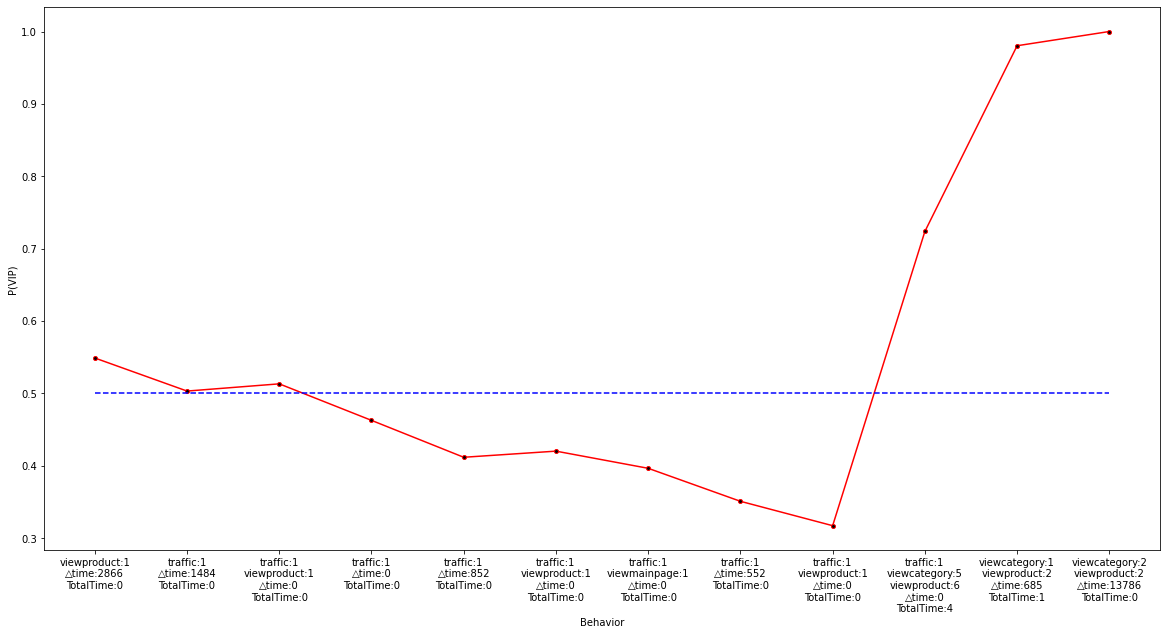

In [ ]:
output_ex(2)

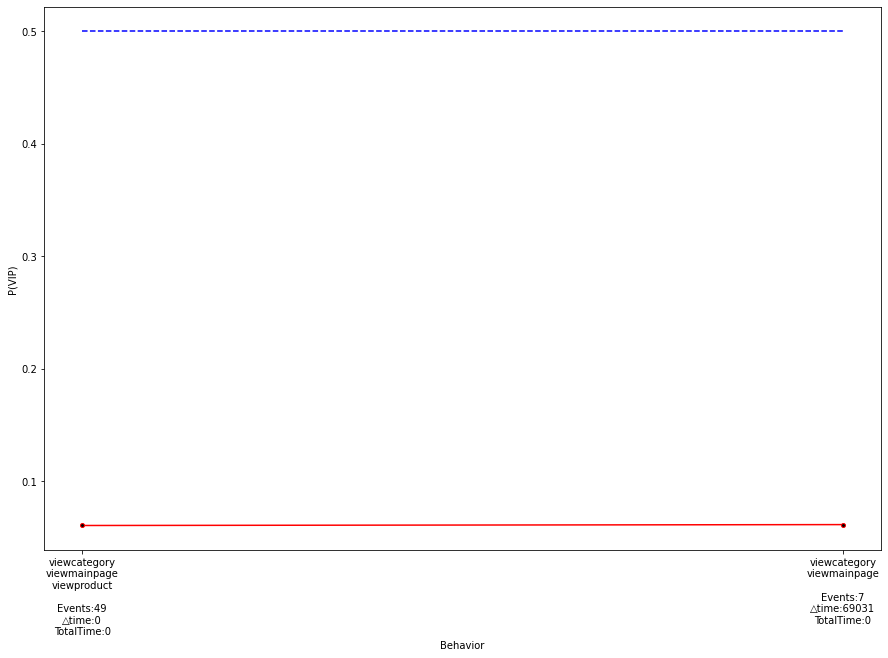

In [ ]:
output_ex(200)

## Tune LSTM

In [ ]:
def tune_LSTM(X_train, y_train, X_test, y_test, layers, neurons, lr, epochs, batch_size):
  model = Sequential()
  model.add(LSTM(neurons, input_shape=(12, 12), return_sequences=True))

  if layers > 1:
    for i in range(1, layers):
      model.add(LSTM(neurons, return_sequences=True))

  model.add(Dense(1, activation='sigmoid'))

  decay_rate = lr / epochs
  opt = Adam(learning_rate=lr, decay=decay_rate)

  # Classification
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  callback = EarlyStopping(monitor='loss', patience=3)
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[callback])

  prediction = model.predict(X_test)
  y_pred = (prediction[:, -1] > 0.5)
  test_acc = accuracy_score(y_pred, y_test)
  test_f1 = f1_score(y_pred, y_test)
  test_AUC = roc_auc_score(y_pred, y_test)

  result = {
      'train_acc': history.history['accuracy'][-1],
      'val_acc': history.history['val_accuracy'][-1],
      'test_acc': test_acc,
      'test_f1': test_f1,
      'test_AUC': test_AUC
  }
  return result

In [ ]:
EPOCHS = 30
BATCH_SIZE = 512
LR = 0.01 

In [ ]:
layers = [1, 2, 3]
neurons = [8, 16, 32, 64]

### LSTM Layers

In [ ]:
NEURONS = 32

In [ ]:
model_list = []

for layer in layers:
  print(layer)
  model = tune_LSTM(X_train, y_train, X_test, y_test, layer, NEURONS, LR, EPOCHS, BATCH_SIZE)
  model_list.append(model)

1
Epoch 1/30
28/28 [==============================] - 4s 45ms/step - loss: 0.6749 - accuracy: 0.5706 - val_loss: 0.6674 - val_accuracy: 0.6109
Epoch 2/30
28/28 [==============================] - 1s 24ms/step - loss: 0.6026 - accuracy: 0.6715 - val_loss: 0.5672 - val_accuracy: 0.6887
Epoch 3/30
28/28 [==============================] - 1s 26ms/step - loss: 0.5612 - accuracy: 0.6989 - val_loss: 0.5430 - val_accuracy: 0.7119
Epoch 4/30
28/28 [==============================] - 1s 24ms/step - loss: 0.5500 - accuracy: 0.7090 - val_loss: 0.5253 - val_accuracy: 0.7246
Epoch 5/30
28/28 [==============================] - 1s 24ms/step - loss: 0.5302 - accuracy: 0.7191 - val_loss: 0.5096 - val_accuracy: 0.7359
Epoch 6/30
28/28 [==============================] - 1s 24ms/step - loss: 0.5109 - accuracy: 0.7306 - val_loss: 0.4962 - val_accuracy: 0.7364
Epoch 7/30
28/28 [==============================] - 1s 25ms/step - loss: 0.5060 - accuracy: 0.7308 - val_loss: 0.5041 - val_accuracy: 0.7264
Epoch 8/30


In [ ]:
result_df = pd.DataFrame(model_list)

In [ ]:
result_df

,train_acc,val_acc,test_acc,test_f1,test_AUC
0,0.752890,0.757347,0.887054,0.882106,0.892408
1,0.754512,0.757998,0.897991,0.889800,0.911509
2,0.753012,0.760486,0.891964,0.882752,0.906626


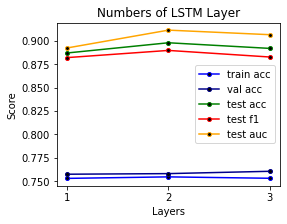

In [ ]:
plt.figure(figsize=(4,3))
plt.plot(range(len(layers)), result_df['train_acc'], color="blue", marker='o', markerfacecolor='black', markersize=4,  label='train acc')
plt.plot(range(len(layers)), result_df['val_acc'], color="darkblue", marker='o', markerfacecolor='black', markersize=4, label='val acc')
plt.plot(range(len(layers)), result_df['test_acc'], color="green", marker='o', markerfacecolor='black', markersize=4, label='test acc')
plt.plot(range(len(layers)), result_df['test_f1'], color="red", marker='o', markerfacecolor='black', markersize=4, label='test f1')
plt.plot(range(len(layers)), result_df['test_AUC'], color="orange", marker='o', markerfacecolor='black', markersize=4, label='test auc')
plt.xticks(range(len(layers)), layers)
plt.title('Numbers of LSTM Layer')
plt.xlabel('Layers')
plt.ylabel('Score')
plt.legend()
plt.show()

### Hidden Neurons of LSTM Layers

In [ ]:
LAYERS = 2

In [ ]:
model_list = []

for neuron in neurons:
  print(neuron)
  model = tune_LSTM(X_train, y_train, X_test, y_test, LAYERS, neuron, LR, EPOCHS, BATCH_SIZE)
  model_list.append(model)

8
Epoch 1/30
28/28 [==============================] - 10s 106ms/step - loss: 0.6843 - accuracy: 0.5570 - val_loss: 0.6438 - val_accuracy: 0.6510
Epoch 2/30
28/28 [==============================] - 1s 38ms/step - loss: 0.6120 - accuracy: 0.6441 - val_loss: 0.5644 - val_accuracy: 0.6971
Epoch 3/30
28/28 [==============================] - 1s 32ms/step - loss: 0.5516 - accuracy: 0.7075 - val_loss: 0.5278 - val_accuracy: 0.7234
Epoch 4/30
28/28 [==============================] - 1s 33ms/step - loss: 0.5254 - accuracy: 0.7208 - val_loss: 0.5032 - val_accuracy: 0.7302
Epoch 5/30
28/28 [==============================] - 1s 37ms/step - loss: 0.5159 - accuracy: 0.7262 - val_loss: 0.5437 - val_accuracy: 0.7061
Epoch 6/30
28/28 [==============================] - 1s 34ms/step - loss: 0.5132 - accuracy: 0.7246 - val_loss: 0.4867 - val_accuracy: 0.7469
Epoch 7/30
28/28 [==============================] - 1s 36ms/step - loss: 0.5711 - accuracy: 0.6924 - val_loss: 0.5539 - val_accuracy: 0.6872
Epoch 8/3

In [ ]:
result_df = pd.DataFrame(model_list)

In [ ]:
result_df

,train_acc,val_acc,test_acc,test_f1,test_AUC
0,0.755012,0.759882,0.893973,0.885404,0.907509
1,0.750692,0.758975,0.893750,0.887470,0.902129
2,0.757698,0.760138,0.890625,0.881700,0.904266
3,0.756251,0.762323,0.895536,0.889518,0.903630


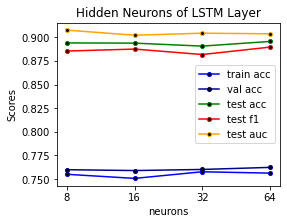

In [ ]:
plt.figure(figsize=(4,3))
plt.plot(range(len(neurons)), result_df['train_acc'], color="blue", marker='o', markerfacecolor='black', markersize=4,  label='train acc')
plt.plot(range(len(neurons)), result_df['val_acc'], color="darkblue", marker='o', markerfacecolor='black', markersize=4, label='val acc')
plt.plot(range(len(neurons)), result_df['test_acc'], color="green", marker='o', markerfacecolor='black', markersize=4, label='test acc')
plt.plot(range(len(neurons)), result_df['test_f1'], color="red", marker='o', markerfacecolor='black', markersize=4, label='test f1')
plt.plot(range(len(neurons)), result_df['test_AUC'], color="orange", marker='o', markerfacecolor='black', markersize=4, label='test auc')
plt.xticks(range(len(neurons)), neurons)
plt.title('Hidden Neurons of LSTM Layer')
plt.xlabel('neurons')
plt.ylabel('Scores')
plt.legend()
plt.show()

### 決定 learning rate

In [ ]:
LAYERS = 2
NEURONS = 32

EPOCHS = 30
BATCH_SIZE = 512
LRs = [0.1, 0.01, 0.001]

In [ ]:
model_list = []

for LR in LRs:
  print(LR)
  model = tune_LSTM(X_train, y_train, X_test, y_test, LAYERS, NEURONS, LR, EPOCHS, BATCH_SIZE)
  model_list.append(model)

0.1
Epoch 1/30
28/28 [==============================] - 9s 101ms/step - loss: 0.7042 - accuracy: 0.5343 - val_loss: 0.6982 - val_accuracy: 0.4997
Epoch 2/30
28/28 [==============================] - 1s 49ms/step - loss: 0.6541 - accuracy: 0.5757 - val_loss: 0.6610 - val_accuracy: 0.6143
Epoch 3/30
28/28 [==============================] - 1s 47ms/step - loss: 0.6519 - accuracy: 0.5820 - val_loss: 0.6046 - val_accuracy: 0.6471
Epoch 4/30
28/28 [==============================] - 1s 48ms/step - loss: 0.5672 - accuracy: 0.6936 - val_loss: 0.5694 - val_accuracy: 0.6935
Epoch 5/30
28/28 [==============================] - 1s 48ms/step - loss: 0.5861 - accuracy: 0.6662 - val_loss: 0.6114 - val_accuracy: 0.6442
Epoch 6/30
28/28 [==============================] - 1s 48ms/step - loss: 0.5833 - accuracy: 0.6629 - val_loss: 0.5196 - val_accuracy: 0.7170
Epoch 7/30
28/28 [==============================] - 1s 51ms/step - loss: 0.5491 - accuracy: 0.6999 - val_loss: 0.5319 - val_accuracy: 0.7063
Epoch 8/

In [ ]:
result_df = pd.DataFrame(model_list)

In [ ]:
result_df

,train_acc,val_acc,test_acc,test_f1,test_AUC
0,0.745430,0.741676,0.866741,0.867481,0.866870
1,0.755332,0.761696,0.896652,0.890414,0.905351
2,0.735400,0.738979,0.876116,0.868327,0.884962


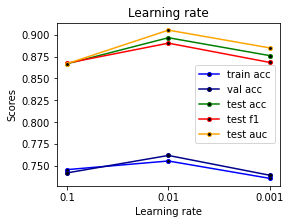

In [ ]:
plt.figure(figsize=(4,3))
plt.plot(range(len(LRs)), result_df['train_acc'], color="blue", marker='o', markerfacecolor='black', markersize=4,  label='train acc')
plt.plot(range(len(LRs)), result_df['val_acc'], color="darkblue", marker='o', markerfacecolor='black', markersize=4, label='val acc')
plt.plot(range(len(LRs)), result_df['test_acc'], color="green", marker='o', markerfacecolor='black', markersize=4, label='test acc')
plt.plot(range(len(LRs)), result_df['test_f1'], color="red", marker='o', markerfacecolor='black', markersize=4, label='test f1')
plt.plot(range(len(LRs)), result_df['test_AUC'], color="orange", marker='o', markerfacecolor='black', markersize=4, label='test auc')
plt.xticks(range(len(LRs)), LRs)
plt.title('Learning rate')
plt.xlabel('Learning rate')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [ ]:
model_list[1]

{'test_AUC': 0.9053508027909077,
 'test_acc': 0.8966517857142857,
 'test_f1': 0.890414201183432,
 'train_acc': 0.7553319334983826,
 'val_acc': 0.7616955041885376}

## 最佳 model 訓練

In [ ]:
model = Sequential()
  
model.add(LSTM(32, input_shape=(12, 12), return_sequences=True))
model.add(LSTM(32, return_sequences=True))   
model.add(Dense(1, activation='sigmoid'))

decay_rate = 0.01 / 30
opt = Adam(lr=0.01, decay=decay_rate)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 12, 32)            5760      
                                                                 
 lstm_27 (LSTM)              (None, 12, 32)            8320      
                                                                 
 dense_15 (Dense)            (None, 12, 1)             33        
                                                                 
Total params: 14,113
Trainable params: 14,113
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
callback = EarlyStopping(monitor='loss', patience=3)
EPOCHS = 30
BATCH_SIZE = 512
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, callbacks=[callback], verbose=1)

Epoch 1/30
28/28 [==============================] - 7s 85ms/step - loss: 0.6695 - accuracy: 0.5673 - val_loss: 0.6003 - val_accuracy: 0.6550
Epoch 2/30
28/28 [==============================] - 1s 50ms/step - loss: 0.6016 - accuracy: 0.6549 - val_loss: 0.5655 - val_accuracy: 0.6433
Epoch 3/30
28/28 [==============================] - 1s 51ms/step - loss: 0.5415 - accuracy: 0.6838 - val_loss: 0.5285 - val_accuracy: 0.7063
Epoch 4/30
28/28 [==============================] - 1s 49ms/step - loss: 0.5714 - accuracy: 0.6735 - val_loss: 0.5453 - val_accuracy: 0.6858
Epoch 5/30
28/28 [==============================] - 1s 51ms/step - loss: 0.5354 - accuracy: 0.6903 - val_loss: 0.5072 - val_accuracy: 0.7309
Epoch 6/30
28/28 [==============================] - 1s 50ms/step - loss: 0.5299 - accuracy: 0.7165 - val_loss: 0.5758 - val_accuracy: 0.6629
Epoch 7/30
28/28 [==============================] - 1s 49ms/step - loss: 0.5719 - accuracy: 0.6695 - val_loss: 0.5561 - val_accuracy: 0.6731
Epoch 8/30
28

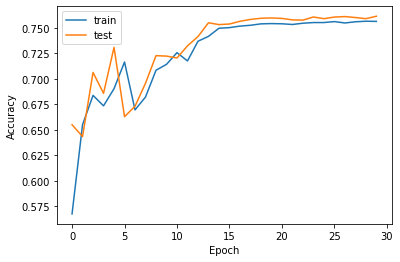

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
y_pred = (prediction[:, -1] > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
print('F1 score: ', f1_score(y_pred, y_test))
print('AUC score: ', roc_auc_score(y_pred, y_test))
print('Confusion matrix:')
confusion_matrix(y_test,y_pred)

Accuracy of the model :  0.8863839285714286
F1 score:  0.882366535706032
AUC score:  0.8903771374803411
Confusion matrix:


array([[2062,  132],
       [ 377, 1909]])

In [ ]:
labels = ['NotVIP', 'VIP']

In [ ]:
Counter(y_test)

Counter({0.0: 2194, 1.0: 2286})

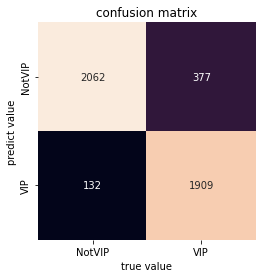

In [ ]:
matric = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(4,4))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=labels, yticklabels=labels)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("report:\n",classification_report(y_pred, y_test,labels=[0, 1],target_names=labels))

report:
               precision    recall  f1-score   support

      NotVIP       0.94      0.85      0.89      2439
         VIP       0.84      0.94      0.88      2041

    accuracy                           0.89      4480
   macro avg       0.89      0.89      0.89      4480
weighted avg       0.89      0.89      0.89      4480



In [ ]:
prediction_all = model.predict(np.array(X).reshape(len(X), 12, 12))

In [ ]:
y_pred_all = (prediction_all[:, -1] > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred_all, y))
print('F1 score: ', f1_score(y_pred_all, y))
print('AUC score: ', roc_auc_score(y_pred_all, y))
print('Confusion matrix:')
confusion_matrix(y_pred_all, y)

Accuracy of the model :  0.2528862994602709
F1 score:  0.23012891344383057
AUC score:  0.4999580822480945
Confusion matrix:


array([[11853,  1826],
       [60880,  9372]])

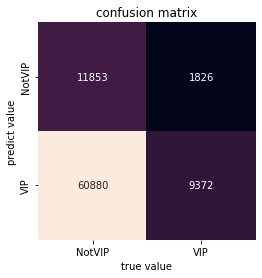

In [ ]:
matric = confusion_matrix(y_pred_all, y)
plt.figure(figsize=(4,4))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=labels, yticklabels=labels)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("report:\n",classification_report(y_pred_all, y,labels=[0, 1],target_names=labels))

report:
               precision    recall  f1-score   support

      NotVIP       0.16      0.87      0.27     13679
         VIP       0.84      0.13      0.23     70252

    accuracy                           0.25     83931
   macro avg       0.50      0.50      0.25     83931
weighted avg       0.73      0.25      0.24     83931



## 取得每層 output

In [ ]:
model.layers[0].get_weights()[0].shape

(12, 128)

In [ ]:
def get_layer_output(X, idx):
  get_output = K.function([model.layers[0].input], [model.layers[idx].output])
  return get_output([X])

In [ ]:
output_layer = get_layer_output(X_test, 2)
all_output_layer = get_layer_output(X_uds, 2)

In [ ]:
ot = pd.DataFrame(output_layer[0][:, -1], columns=['P'])
ot[(ot['P']<0.5)&(ot['P']>0.4)].index.values

array([ 181,  233,  234,  289,  511,  515,  521,  623,  684,  699,  710,
        816,  928,  950,  965,  981, 1235, 1357, 1473, 1484, 1530, 1602,
       1681, 1784, 1820, 1838, 1929, 1947, 2017, 2018, 2020, 2050, 2178,
       2206, 2269, 2314, 2418, 2456, 2472, 2542, 2675, 2684, 2787, 2797,
       2852, 2892, 2896, 2912, 2998, 3055, 3105, 3118, 3135, 3161, 3209,
       3300, 3328, 3354, 3398, 3428, 3479, 3574, 3586, 3700, 3716, 3776,
       3920, 3970, 4011, 4021, 4139, 4363, 4406])

## inverse scaler of X data

In [ ]:
def inverse_normalize(data, scaler):
  scaled_df = pd.DataFrame(scaler.inverse_transform(data[cols].values.reshape(-1,12)), columns=cols)
  return scaled_df

In [ ]:
bh_cols = ['add', 'checkout', 'purchase', 'register', 'search', 'traffic', 'viewactivity', 'viewcategory', 'viewmainpage', 'viewproduct']

### Test Data

In [ ]:
X_test_tp = X_test.transpose(0, 1 ,2)
test_data_df = pd.concat([pd.DataFrame(x, columns=cols) for x in X_test_tp], keys=np.arange(X_test_tp.shape[0]))
test_data_df.reset_index(inplace=True)
test_data_df = test_data_df.drop(['level_0', 'level_1'], axis=1)
test_original = inverse_normalize(test_data_df, scaler)
test_original[cols] = test_original[cols].astype(int)

In [ ]:
test_original['bh'] = test_original[bh_cols].apply(lambda x: '\n'.join([y+':'+str(z) for y, z in x.items() if z != 0]), axis=1).to_list()
test_original['x_label'] = (test_original['bh']  
    + ['\n△time:'] * len(test_original) + test_original['TimeDiff'].astype(str)
    + ['\nTotalTime:'] * len(test_original) + test_original['TotalTime'].astype(str))

### All Undersampled Data

In [ ]:
X_uds_tp = X_uds.transpose(0, 1 ,2)
all_data_df = pd.concat([pd.DataFrame(x, columns=cols) for x in X_uds_tp], keys=np.arange(X_uds_tp.shape[0]))
all_data_df.reset_index(inplace=True)
all_data_df = all_data_df.drop(['level_0', 'level_1'], axis=1)
all_data_original = inverse_normalize(all_data_df, scaler)
all_data_original[cols] = all_data_original[cols].astype(int)

In [ ]:
all_data_original['bh'] = all_data_original[bh_cols].apply(lambda x: '\n'.join([y+':'+str(z) for y, z in x.items() if z != 0]), axis=1).to_list()
all_data_original['x_label'] = (all_data_original['bh']  
    + ['\n△time:'] * len(all_data_original) + all_data_original['TimeDiff'].astype(str)
    + ['\nTotalTime:'] * len(all_data_original) + all_data_original['TotalTime'].astype(str))

In [ ]:
all_data_original['x_label'][0]

'\n△time:0\nTotalTime:0'

## 結果解釋

In [ ]:
def get_output_df(idx, data, output_layer):
  start_idx = idx * 12
  end_idx = (idx + 1) * 12
  df_eg = data.iloc[start_idx: end_idx]
  df_eg = df_eg.loc[~(df_eg[bh_cols]==0).all(axis=1)]
  df_eg['Output'] = list(output_layer[0][idx].reshape(1,12)[0])[-len(df_eg):]
  df_eg['Member'] = ['Member' + str(idx)] *len(df_eg)

  return df_eg

### 取得 all output of test data

In [ ]:
len(get_output_df(1069, test_original, output_layer))

12

In [ ]:
df_egs = []
for i in range(len(X_test)):
  df_eg = get_output_df(i, test_original, output_layer)
  df_egs.append(df_eg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
test_output = pd.concat(df_egs)

In [ ]:
len(test_output['Member'].unique())

4480

In [ ]:
test_output.to_csv('Session Behavior Count Outputs for test data.csv', index=False)

### 取得 all output of all undersampled data

In [ ]:
df_egs = []
for i in range(len(X_uds)):
  df_eg = get_output_df(i, all_data_original, all_output_layer)
  df_egs.append(df_eg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
all_output = pd.concat(df_egs)

In [ ]:
len(all_output['Member'].unique())

22396

In [ ]:
all_output.to_csv('Session Behavior Count Outputs.csv', index=False)

## 繪圖

In [ ]:
def output_ex(idx):
  start_idx = idx * 12
  end_idx = start_idx + 12
  eg = test_original.iloc[start_idx: end_idx]
  eg = eg.loc[~(eg[bh_cols]==0).all(axis=1)]
  x_label =  list(eg['x_label'])
  output_eg = list(layer_output_2[0][idx].reshape(1,12)[0])[-len(x_label):]
  x_axis = range(len(x_label))
  base = [0.5] * len(x_axis)

  plt.figure(figsize=(18,10))
  plt.plot(x_axis, output_eg, color="red", marker='o', markerfacecolor='black', markersize=4)
  plt.plot(x_axis, base, color="blue", linestyle='dashed')
  plt.xticks(x_axis,x_label)
  plt.xlabel('Behavior')
  plt.ylabel('P(VIP)')
  plt.show()

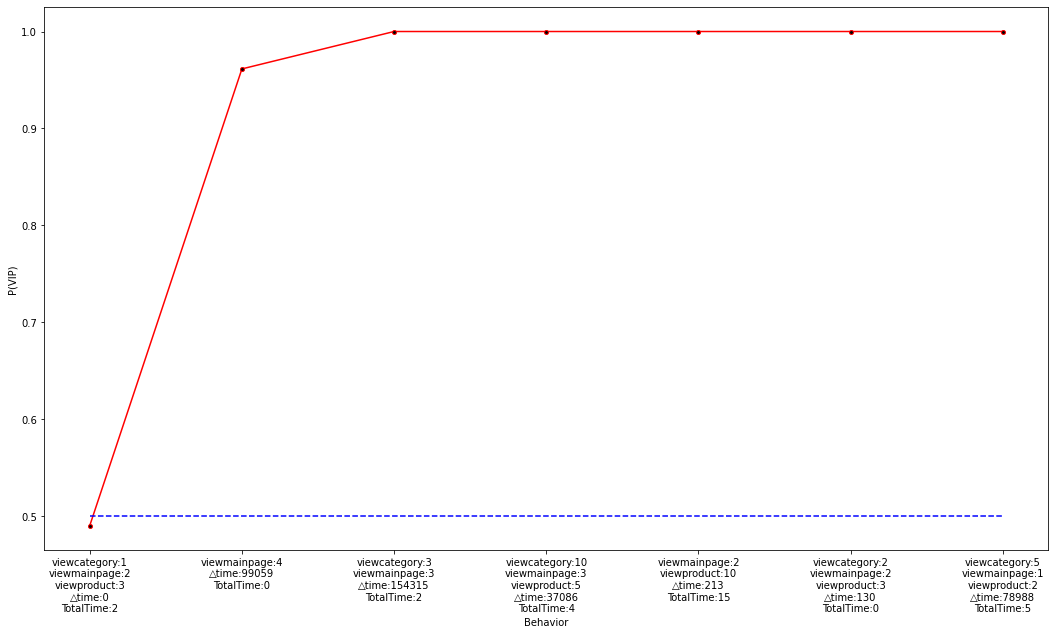

In [ ]:
output_ex(6)

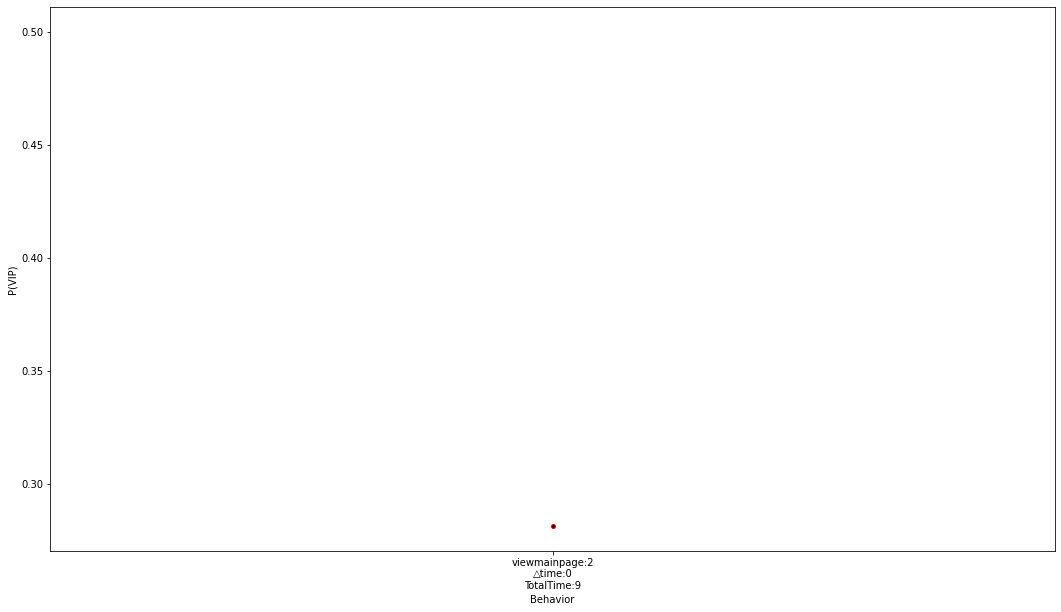

In [ ]:
output_ex(200)